# CA3

### Imports

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import itertools
import joblib 
from sklearn.feature_selection import SelectFromModel

### Reading data

In [90]:
df= pd.read_csv("train.csv",index_col=0 )

### Data exploration and visualisation

In [91]:
## for comparing different features to each other from the dataset, with hue as Edible
#sns.pairplot(df, hue='Edible')
#plt.show()

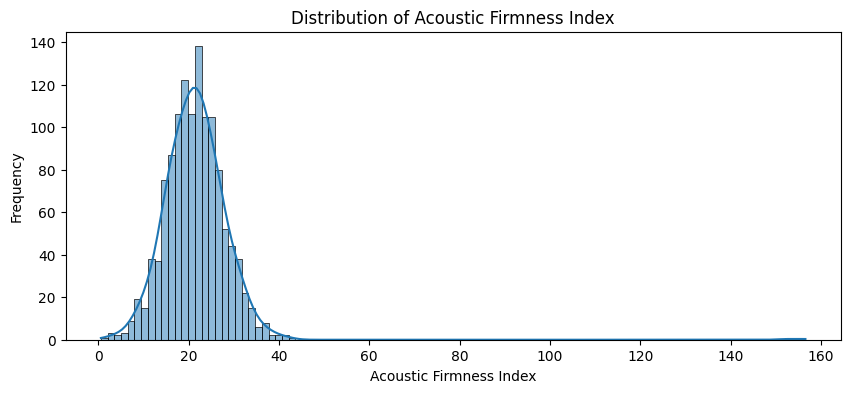

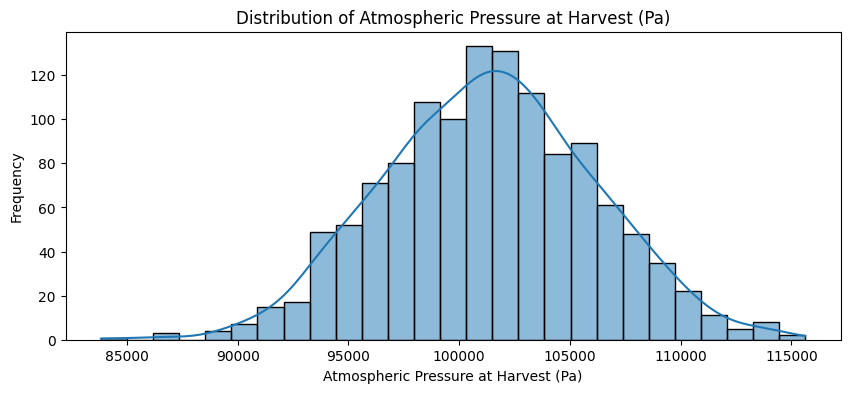

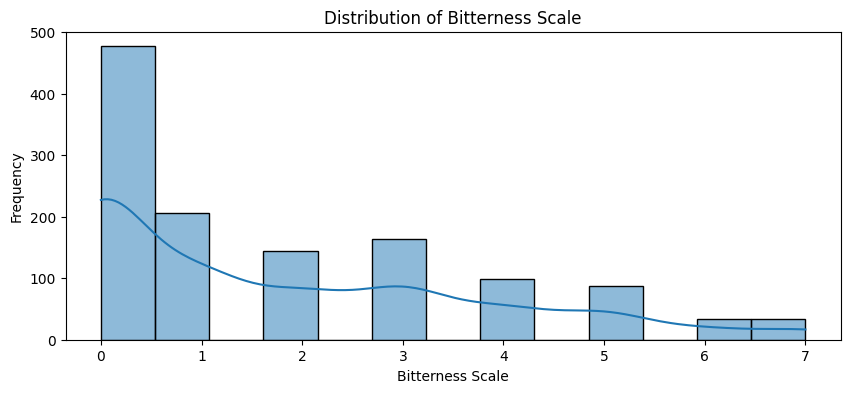

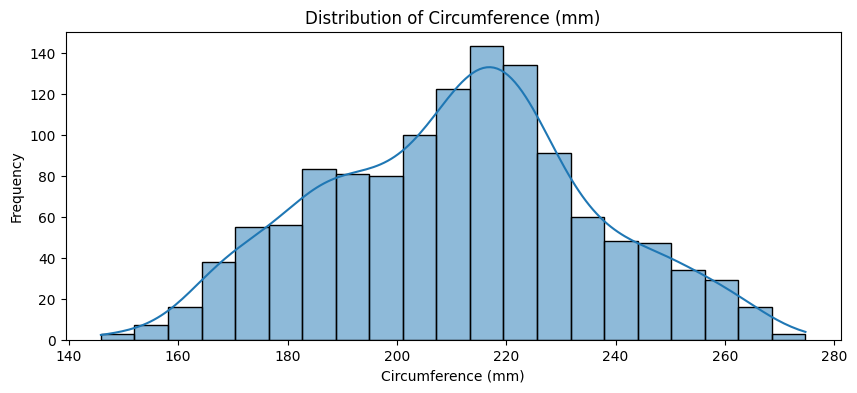

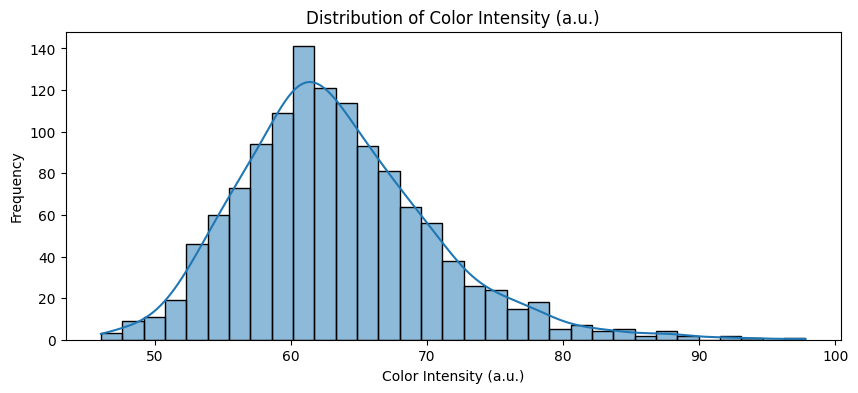

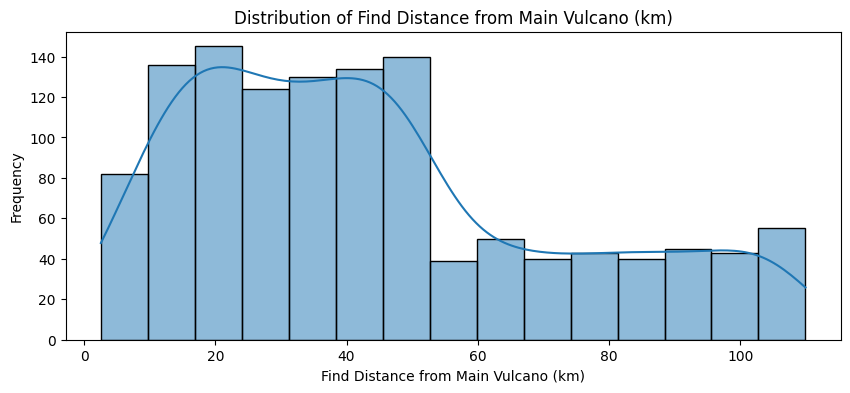

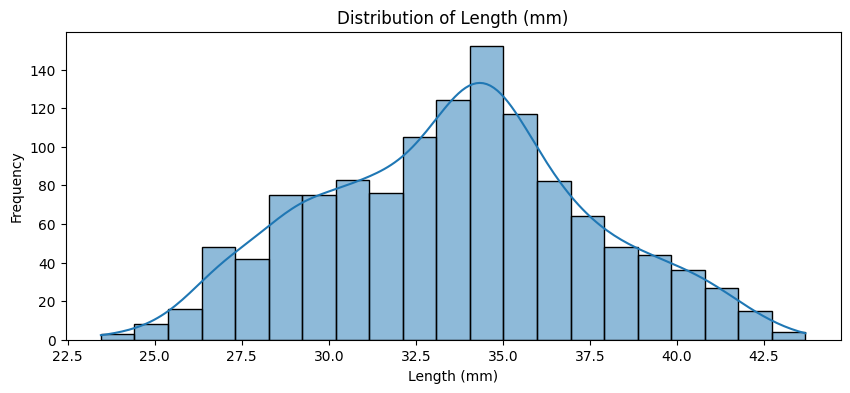

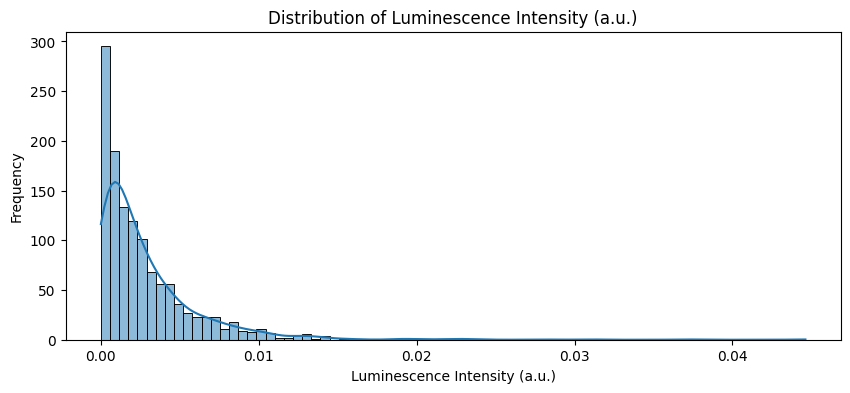

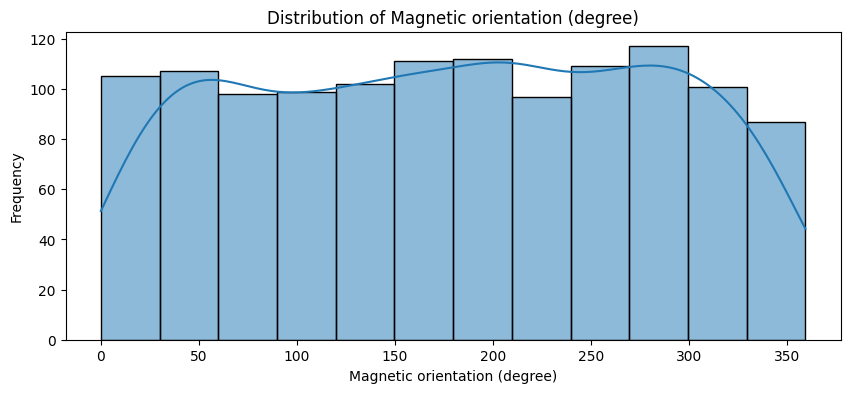

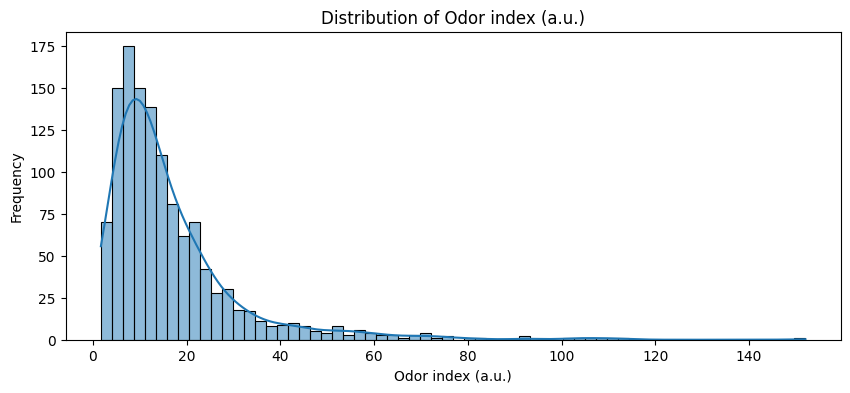

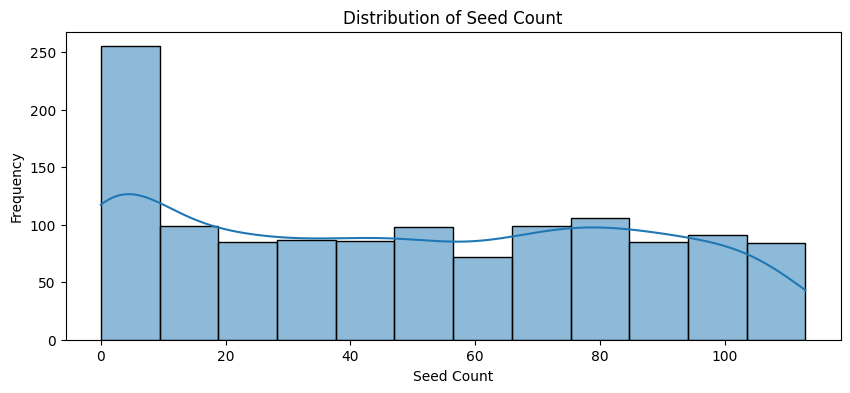

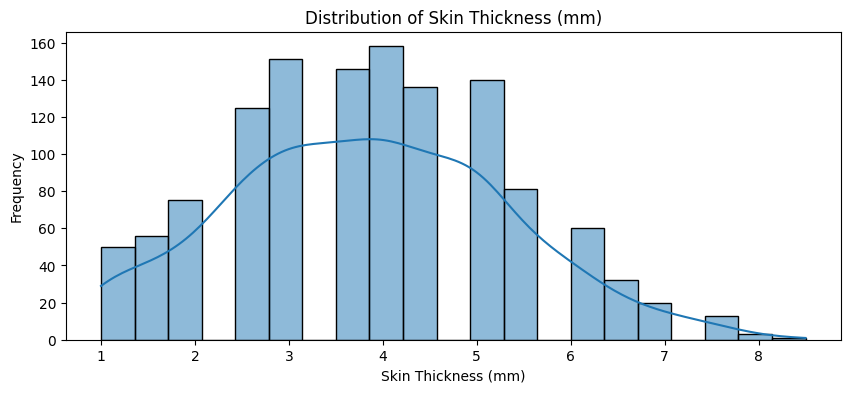

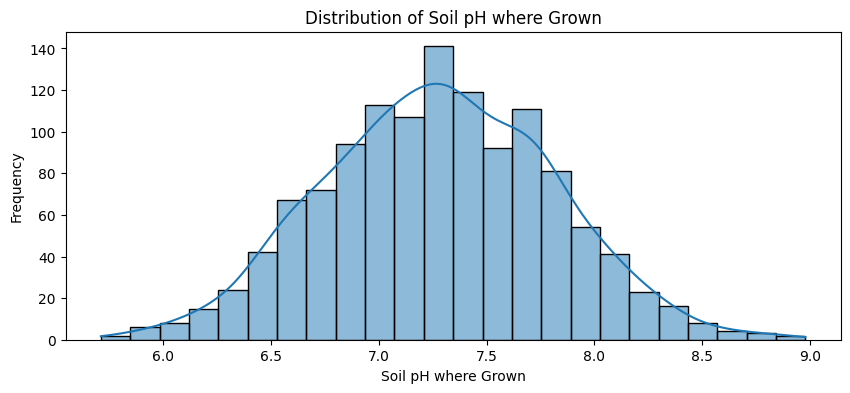

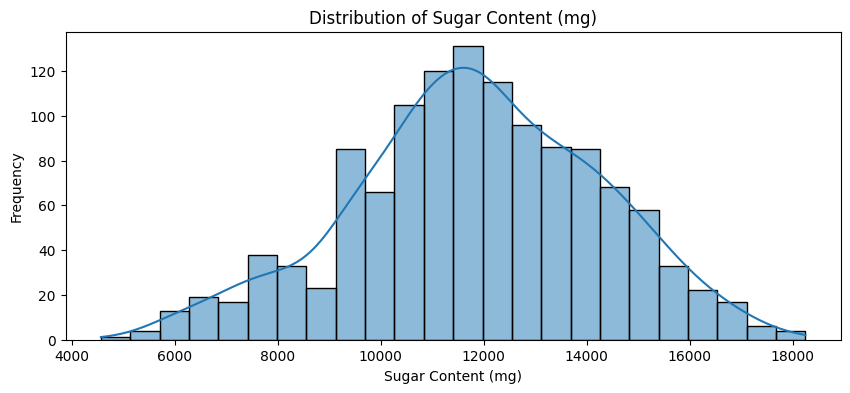

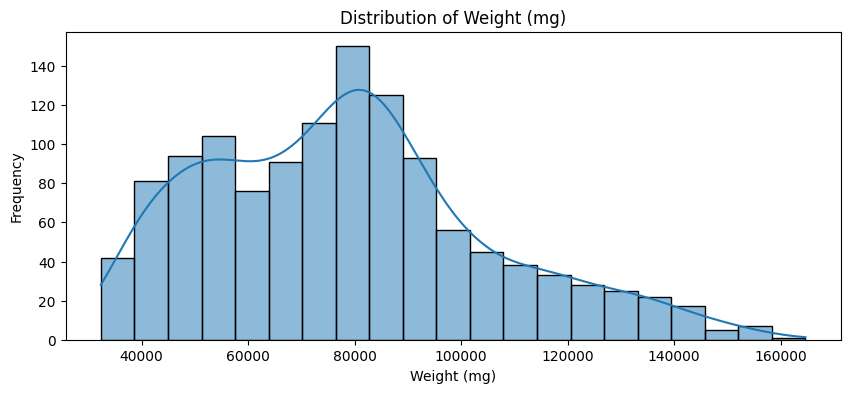

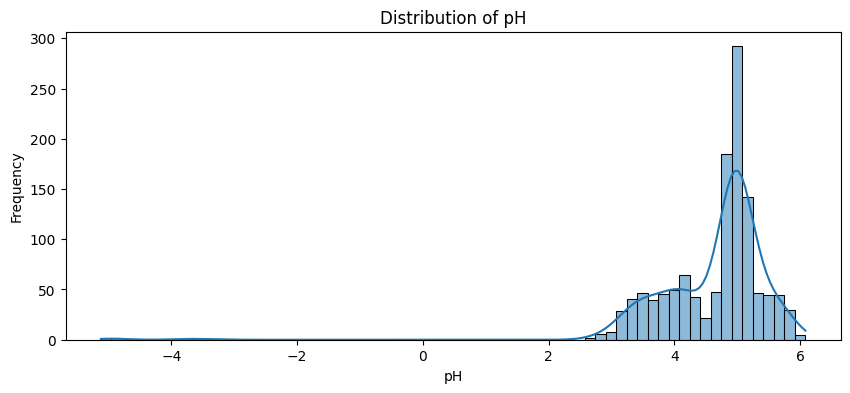

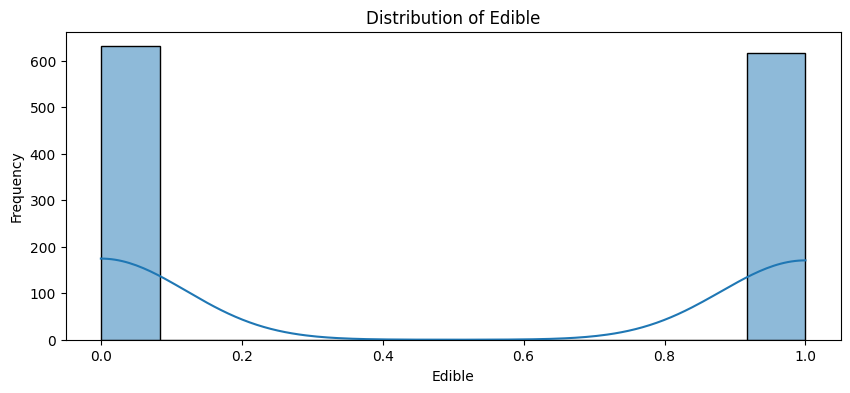

In [92]:
#For looking at the distribution of the data of each feature in the dataset 
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)  # kde (Kernel Density Estimate) adds a density curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [93]:
# #Looking for correlation between features in the dataset 

# corr_matrix = df.corr()
# # Apply formatting to round the values to two decimal places.
# # The .applymap() method applies a lambda function to each element of the correlation matrix.
# # The lambda function converts each value 'x' in the matrix to a formatted string with two decimal places.
# corr_matrix_rounded = corr_matrix.applymap(lambda x: f'{x:.2f}')

# # Plotting the heatmap, first setting the size of the heatmap
# plt.figure(figsize=(10, 8))
# # 'annot=corr_matrix_rounded' is used to display the rounded correlation values as annotations on the heatmap.
# # 'fmt=' specifies that the annotation texts (rounded values) are strings, not floats or integers.
# # 'cmap='coolwarm' sets the colormap to 'coolwarm' 
# sns.heatmap(corr_matrix, annot=corr_matrix_rounded, fmt='', cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [94]:
# Looking at df to see how many rows and columns there is 
df

,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),Seed Count,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible
0,28.7,98741.0,0.0,222.897985,70.28,103.145212,35.481123,0.002636,61.877407,2.700236,71.355713,2.5,8.14,13792.0,87411.1826,5.090000,1.0
1,19.4,96077.0,0.0,205.832386,66.48,102.005624,32.609013,0.015950,297.191998,9.618586,46.291493,2.0,7.63,12985.0,72608.1826,4.990000,1.0
2,22.1,109154.0,2.0,234.406576,69.92,37.847317,37.926057,0.000279,61.103057,7.970050,54.442385,1.5,8.03,10008.0,109375.1826,5.219156,0.0
3,28.0,105277.0,5.0,214.999623,64.05,100.118399,34.610539,0.002323,58.677047,68.116450,106.401880,4.5,7.43,11303.0,84958.7826,3.228828,0.0
4,22.6,103898.0,2.0,180.542626,53.63,63.590438,28.948902,0.008611,317.261190,7.953544,48.057754,5.0,6.71,11475.0,49717.1826,4.800000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,16.8,99423.0,0.0,212.988102,61.08,40.910882,33.728356,0.003155,195.342578,25.475841,7.033815,3.5,6.67,12224.0,77045.1826,5.000000,1.0
1244,32.8,97732.0,1.0,216.074798,76.20,19.335461,34.925058,0.001954,167.035722,92.206845,51.766716,4.0,6.50,9626.0,87212.3826,5.332933,0.0
1245,13.6,93981.0,0.0,181.435023,69.64,48.416290,29.071256,0.000355,118.170049,7.579661,7.756912,2.0,6.99,10423.0,51560.1826,4.880000,1.0
1246,26.7,98269.0,1.0,228.399719,76.16,46.333693,37.776037,0.002577,217.742170,14.873524,66.630218,2.0,6.95,6753.0,105907.1826,3.383773,0.0


#### Comments on the data after visualization
Some of the pH values didn't look right. There was some negative ph values, which doesn't make sense.
It looked like there was some outliers on some of the features, which is also getting removed before training.


### Data cleaning

In [95]:
# # Cleaning the data 

# # Dropping rows with negative pH values
# df_cleaned = df.drop(df[df['pH'] < 0].index)
# # Dropping rows where data is missing. 
# df_cleaned= df_cleaned.fillna(df.median())

# #Dropping rows with feature values that clearly looks like outliers.
# # I did this manually by just looking at the plots, but i could've also removed data with z-score
# df_cleaned= df_cleaned.drop(df_cleaned[df_cleaned["Acoustic Firmness Index"] > 50].index)
# #f_cleaned= df_cleaned.drop(df_cleaned[df_cleaned["Luminescence Intensity (a.u.)"] > 0.017].index)
# df_cleaned= df_cleaned.drop(df_cleaned[df_cleaned["Odor index (a.u.)"] > 85].index)
# # For checking how many rows i've removed
# df_cleaned


# # Cleaning the data 



# Dropping rows with negative pH values
# Dropping rows where data is missing. 
#df_cleaned = df_cleaned.dropna()

#df_cleaned = df_cleaned.fillna(df.mode().iloc[0]) #0.9153
df_cleaned= df.fillna(df.median()) #0.9208
#df_filled = df.fillna(df.mean())

df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['pH'] < 0].index)


#Dropping rows with feature values that clearly looks like outliers.
# I did this manually by just looking at the plots, but i could've also removed data with z-score
df_cleaned= df_cleaned.drop(df_cleaned[df_cleaned["Acoustic Firmness Index"] > 50].index)
#df_cleaned= df_cleaned.drop(df_cleaned[df_cleaned["Luminescence Intensity (a.u.)"] > 0.017].index)
df_cleaned= df_cleaned.drop(df_cleaned[df_cleaned["Odor index (a.u.)"] > 85].index)
# For checking how many rows i've removed



df_cleaned

,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),Seed Count,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible
0,28.7,98741.0,0.0,222.897985,70.28,103.145212,35.481123,0.002636,61.877407,2.700236,71.355713,2.5,8.14,13792.0,87411.1826,5.090000,1.0
1,19.4,96077.0,0.0,205.832386,66.48,102.005624,32.609013,0.015950,297.191998,9.618586,46.291493,2.0,7.63,12985.0,72608.1826,4.990000,1.0
2,22.1,109154.0,2.0,234.406576,69.92,37.847317,37.926057,0.000279,61.103057,7.970050,54.442385,1.5,8.03,10008.0,109375.1826,5.219156,0.0
3,28.0,105277.0,5.0,214.999623,64.05,100.118399,34.610539,0.002323,58.677047,68.116450,106.401880,4.5,7.43,11303.0,84958.7826,3.228828,0.0
4,22.6,103898.0,2.0,180.542626,53.63,63.590438,28.948902,0.008611,317.261190,7.953544,48.057754,5.0,6.71,11475.0,49717.1826,4.800000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,17.1,91630.0,4.0,232.216559,58.31,20.549281,37.306247,0.003299,159.307920,2.108987,46.818059,6.0,7.14,8689.0,104461.1826,3.563446,0.0
1243,16.8,99423.0,0.0,212.988102,61.08,40.910882,33.728356,0.003155,195.342578,25.475841,7.033815,3.5,6.67,12224.0,77045.1826,5.000000,1.0
1245,13.6,93981.0,0.0,181.435023,69.64,48.416290,29.071256,0.000355,118.170049,7.579661,7.756912,2.0,6.99,10423.0,51560.1826,4.880000,1.0
1246,26.7,98269.0,1.0,228.399719,76.16,46.333693,37.776037,0.002577,217.742170,14.873524,66.630218,2.0,6.95,6753.0,105907.1826,3.383773,0.0


### Data preprocessing and visualisation

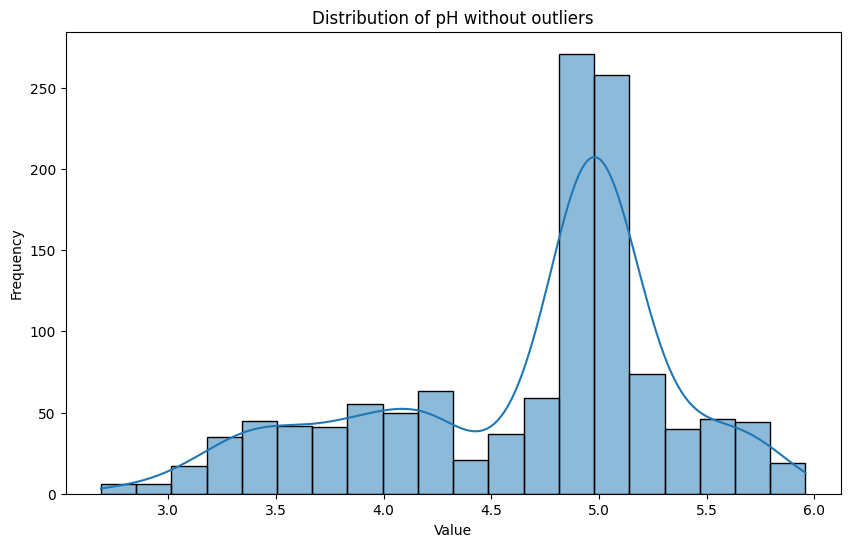

In [96]:
# Plotting the distribution of pH values after data-cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["pH"], kde=True)
plt.title('Distribution of pH without outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

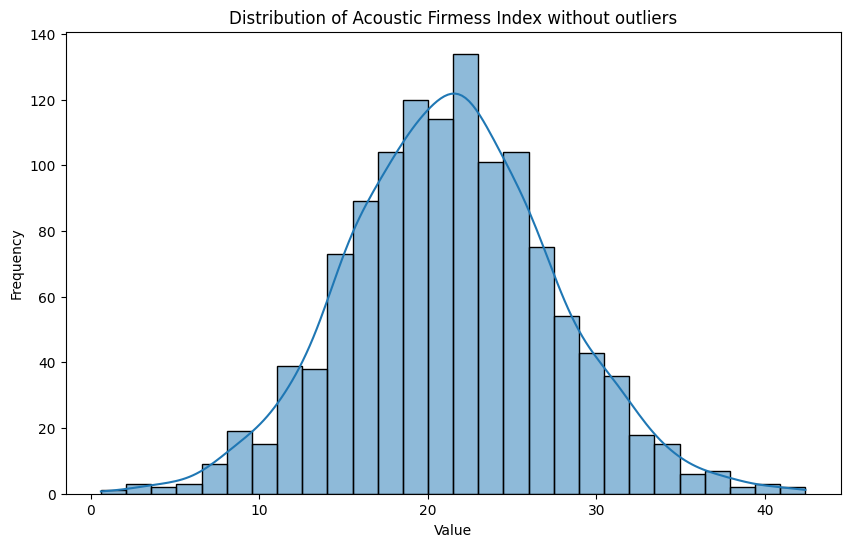

In [97]:
# Plotting the distribution of Acoustic Firmess Index after data-cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Acoustic Firmness Index"], kde=True)
plt.title('Distribution of Acoustic Firmess Index without outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

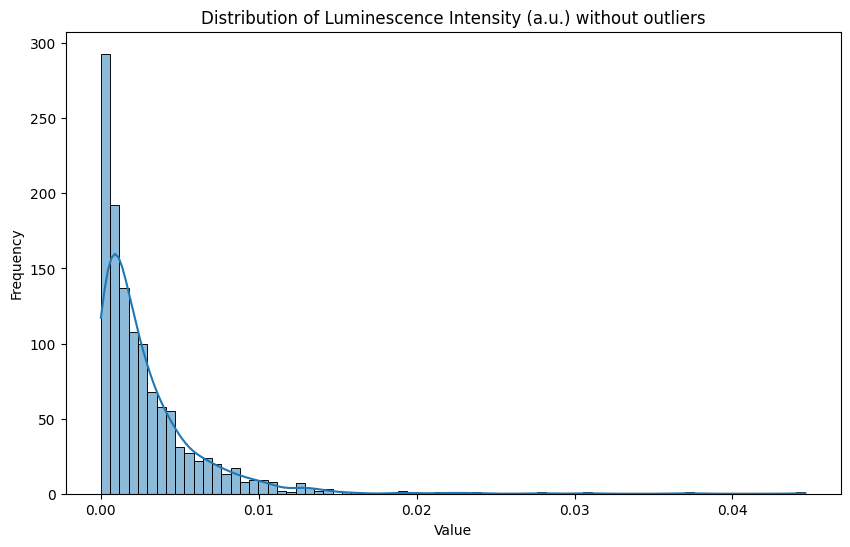

In [98]:
# Plotting the distribution of Luminescence Intensity (a.u.) after data-cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Luminescence Intensity (a.u.)"], kde=True)
plt.title('Distribution of Luminescence Intensity (a.u.) without outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

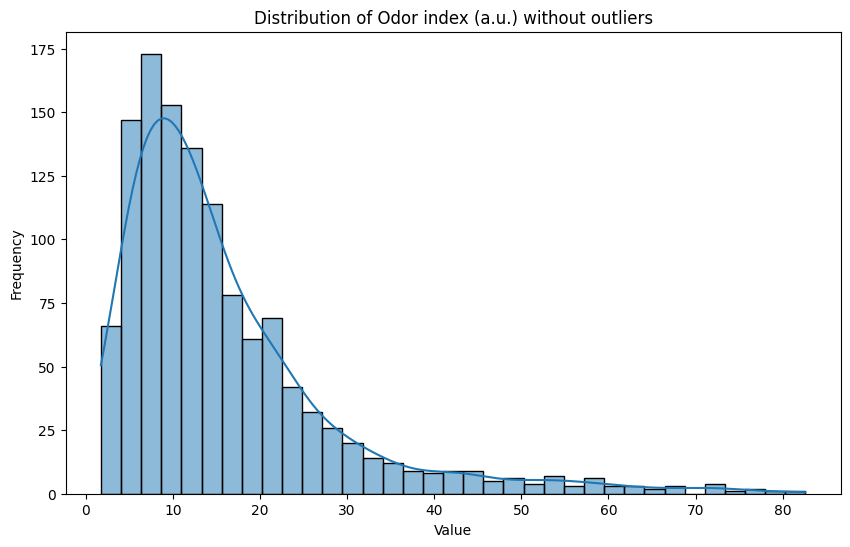

In [99]:
# Plotting the distribution of Odor index (a.u.) after data-cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Odor index (a.u.)"], kde=True)
plt.title('Distribution of Odor index (a.u.) without outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [100]:
# Removing the target column from the DataFrame and uses the rest as features
X = df_cleaned.drop('Edible', axis=1)  
# Selcts Edible as target columns 
y = df_cleaned['Edible']

#Splitting up into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialise standard scaler and compute mean and stddev from training data
sc = StandardScaler()
sc.fit(X_train)


# Transform (standardise) both X_train and X_test with mean and stddev from
# training data, to avoid leakage 
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Train a random forest classifier to get feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf = clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Create a model with SelectFromModel
sfm = SelectFromModel(clf, threshold="median")  # or set a custom threshold

# Train the selector on the scaled training data
sfm.fit(X_train, y_train)

# Transform the training and test datasets
X_train_transformed = sfm.transform(X_train)
X_test_transformed = sfm.transform(X_test)

# Now, X_train_transformed and X_test_transformed contain only the selected features

### Modelling

In [102]:
# No need to standardize the data for Random Forest 

# Trying ot RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=4, max_depth=100, criterion='gini')
rfc.fit(X_train, y_train)

# Making predictions with training data
y_pred_train = rfc.predict(X_train)
#computing accuracy from training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy on training data: {accuracy_train:.2f}')

# Making predictions with test data
y_pred = rfc.predict(X_test)
#computing accuracy from test data
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')


Accuracy on training data: 1.00
Accuracy on test data: 0.92


In [103]:
# No need to standardize the data for decision trees

# Train the model
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_leaf=20)
clf2.fit(X_train, y_train)

# Make predictions and compute accuracy
y_pred_train = clf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy on training data: {accuracy_train:.2f}')

y_pred = clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')


Accuracy on training data: 0.91
Accuracy on test data: 0.91


In [104]:
#Testing out KNN classifier 
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_sc, y_train)

# Make predictions and compute accuracy
y_pred_train = knn.predict(X_train_sc)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy on training data: {accuracy_train:.2f}')

y_pred = knn.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')


Accuracy on training data: 0.87
Accuracy on test data: 0.86


In [105]:
# Testing Support vector machine classifier 
svm = SVC(kernel="linear", C=100)
svm.fit(X_train_sc, y_train)

y_pred_train = svm.predict(X_train_sc)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy on training data: {accuracy_train:.2f}')

y_pred = svm.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')

Accuracy on training data: 0.85
Accuracy on test data: 0.86


In [106]:
# Testing support vector machinge classifier with different settings 
svm = SVC(kernel="rbf", gamma=0.2, C=1000)
svm.fit(X_train_sc, y_train)

y_pred_train = svm.predict(X_train_sc)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy on training data: {accuracy_train:.2f}')

y_pred = svm.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')

Accuracy on training data: 1.00
Accuracy on test data: 0.86


In [107]:
#Testing Logistic regression classifier
LR = LogisticRegression(max_iter=1000, C=1000)
LR.fit(X_train_sc, y_train)

y_pred_train = LR.predict(X_train_sc)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy on training data: {accuracy_train:.2f}')

y_pred = LR.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')

Accuracy on training data: 0.85
Accuracy on test data: 0.84


In [108]:
# Testing perceptron classifier
ppn = Perceptron(max_iter=1000, eta0=0.01,  random_state= 42)
ppn.fit(X_train_sc, y_train)

y_pred_train = ppn.predict(X_train_sc)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy on training data: {accuracy_train:.2f}')

y_pred = ppn.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')

Accuracy on training data: 0.83
Accuracy on test data: 0.81


In [109]:
#rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=100, criterion='gini')
rf = RandomForestClassifier(random_state=42)

# Training the classifier
rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with all features: {accuracy:.4f}")

# Getting feature importance
feature_importances = rf.feature_importances_

# Creating a DataFrame for feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)
print("Feature importances:\n", features_df)

Model accuracy with all features: 0.9187
Feature importances:
                                  Feature  Importance
15                                    pH    0.234173
13                    Sugar Content (mg)    0.126118
2                       Bitterness Scale    0.117119
14                           Weight (mg)    0.080775
6                            Length (mm)    0.069948
7          Luminescence Intensity (a.u.)    0.068749
9                      Odor index (a.u.)    0.056343
3                     Circumference (mm)    0.047983
0                Acoustic Firmness Index    0.038648
8          Magnetic orientation (degree)    0.026284
1   Atmospheric Pressure at Harvest (Pa)    0.025742
4                 Color Intensity (a.u.)    0.025164
5   Find Distance from Main Vulcano (km)    0.024629
12                   Soil pH where Grown    0.023813
10                            Seed Count    0.018422
11                   Skin Thickness (mm)    0.016090


In [110]:
#Jeg prøvde i hvert fall

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming X, y, and features_df are already defined
best_accuracy = 0  # Renamed from best_overall_accuracy
best_config = {}  # Renamed from best_overall_config
best_feature_set = []  # Renamed from best_overall_feature_set


# Hyperparameters
criterion_list= ["gini"]
random_states=[42]
max_depth_list= [35]
min_samples_split_list= [10]
n_estimators_list= [150]

min_samples_leaf_list = [10]
max_features_list = [1,2 ]
bootstrap_list = [True, False]
# Initial feature set
current_features = X.columns.tolist()

# Track the process
accuracy_history = []

for _ in range(len(X.columns) - 1):  # Leave at least one feature
    least_important = features_df[features_df['Feature'].isin(current_features)]['Feature'].iloc[-1]
    current_features.remove(least_important)
    
    X_train, X_test, y_train, y_test = train_test_split(X[current_features], y, test_size=0.3, random_state=42)
    
    best_subset_accuracy = 0
    best_subset_config = {}

    for bootstrap in bootstrap_list:
        for max_features in max_features_list:
                for criterion in criterion_list:
                    for random_state in random_states:
                        for max_depth in max_depth_list:
                            for min_samples_split in min_samples_split_list:
                                for n_estimators in n_estimators_list:
                                    model = RandomForestClassifier(
                                        n_estimators=n_estimators,
                                        max_depth=max_depth,
                                        min_samples_split=min_samples_split,
                                        max_features=max_features,
                                        random_state=random_state,
                                        criterion=criterion)
                                    model.fit(X_train, y_train)
                                    y_pred = model.predict(X_test)
                                    current_accuracy = accuracy_score(y_test, y_pred)

                                    if current_accuracy > best_accuracy:
                                        best_accuracy = current_accuracy
                                        best_config = {
                                            'n_estimators': n_estimators,
                                            'max_depth': max_depth,
                                            'min_samples_split': min_samples_split,
                                            'max_features': max_features,
                                            'random_state': random_state,
                                            'criterion': criterion
                                        }
                                        best_feature_set = current_features.copy()

# Output the best overall results
print(f"Best accuracy: {best_accuracy:.4f} with features: {best_feature_set}")
print("Best configuration:", best_config)

Best accuracy: 0.9295 with features: ['Bitterness Scale', 'Length (mm)', 'Luminescence Intensity (a.u.)', 'Odor index (a.u.)', 'Sugar Content (mg)', 'Weight (mg)', 'pH']
Best configuration: {'n_estimators': 150, 'max_depth': 35, 'min_samples_split': 10, 'max_features': 1, 'random_state': 42, 'criterion': 'gini'}


In [111]:
X_reduced = df_cleaned[best_feature_set]  # Select only the columns in your best feature set
y_reduced = df_cleaned["Edible"]  # Your target variable

In [112]:
# # Initialize variables for the loop
# best_accuracy = 0
# best_feature_set = X.columns.tolist()
# current_features = best_feature_set.copy()

# # Track the process
# accuracy_history = []

# # Iteratively remove features
# for _ in range(len(X.columns) - 1):  # Leave at least one feature
#     # Remove the least important feature based on the current feature set
#     least_important = features_df[features_df['Feature'].isin(current_features)]['Feature'].iloc[-1]
#     current_features.remove(least_important)
    
#     # Split the data with the current set of features
#     X_train, X_test, y_train, y_test = train_test_split(X[current_features], y, test_size=0., random_state=42)
    
#     # Initialize and train the model
#     #model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=100, criterion='gini')
#     model = RandomForestClassifier(random_state=42) #jævlig viktig


#     model.fit(X_train, y_train)
    
#     # Predict and evaluate the model
#     y_pred = model.predict(X_test)
#     current_accuracy = accuracy_score(y_test, y_pred)
#     accuracy_history.append((len(current_features), current_accuracy))
    
#     # Update the best model if the current model is better
#     if current_accuracy > best_accuracy:
#         best_accuracy = current_accuracy
#         best_feature_set = current_features.copy()

# # Output the best results
# print(f"Best accuracy: {best_accuracy:.4f} with {len(best_feature_set)} features.")
# print(f"Best feature set: {best_feature_set}")

### Final evaluation

In [113]:
# # Hyperparameters to try
# #n_estimators_list = [10, 50,  100, 250, 1000]
# n_estimators_list= [50, 70, 100]

# #max_depth_list = [5 , 10, 20, None]
# max_depth_list= [10, 15, 20]
# #min_samples_split_list = [2, 4, 10, 30]
# min_samples_split_list = [5, 8, 10]
# #random_states = [10, 42, 50, 60, 100]
# random_states= [42]
# criterion_list = ["gini"]

# # Store the best configuration
# best_accuracy = 0
# best_config = {}

# # Iterate over all combinations of hyperparameters and random states
# for criterion in criterion_list:
#     for random_state in random_states:
#         for max_depth in max_depth_list:
#             for min_samples_split in min_samples_split_list:
#                 for n_estimators in n_estimators_list:
                    
#                     # Initialize and train the RandomForest model
#                     model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=random_state)
#                     model.fit(X_train, y_train)
                    
#                     # Evaluate the model
#                     predictions = model.predict(X_test)
#                     accuracy = accuracy_score(y_test, predictions)
                    
#                     # Update the best configuration if necessary
#                     if accuracy > best_accuracy:
#                         best_accuracy = accuracy
#                         best_config = {
#                             'n_estimators': n_estimators,
#                             'max_depth': max_depth,
#                             'min_samples_split': min_samples_split,
#                             'random_state': random_state,
#                             'criterion': criterion
#                         }

# # Print the best configuration and its accuracy
# print("Best Configuration:")
# print(best_config)
# print(f"Best Validation Accuracy: {best_accuracy:.4f}")


In [114]:
final_model = RandomForestClassifier(**best_config)


# Training the classifierf
final_model.fit(X_reduced, y_reduced)

#final_model.fit(X, y)

x_val= pd.read_csv("test.csv",index_col=0 )

x_val_selected = x_val[best_feature_set]

predictions= final_model.predict(x_val_selected).astype(int)


In [115]:
# Create a DataFrame with predictions
predictions_df = pd.DataFrame(predictions, columns=['Edible'])
predictions_df.index.name = 'index'

# Save to a CSV file
predictions_df.to_csv('predictions.csv')



### Kaggle submission